In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [11]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


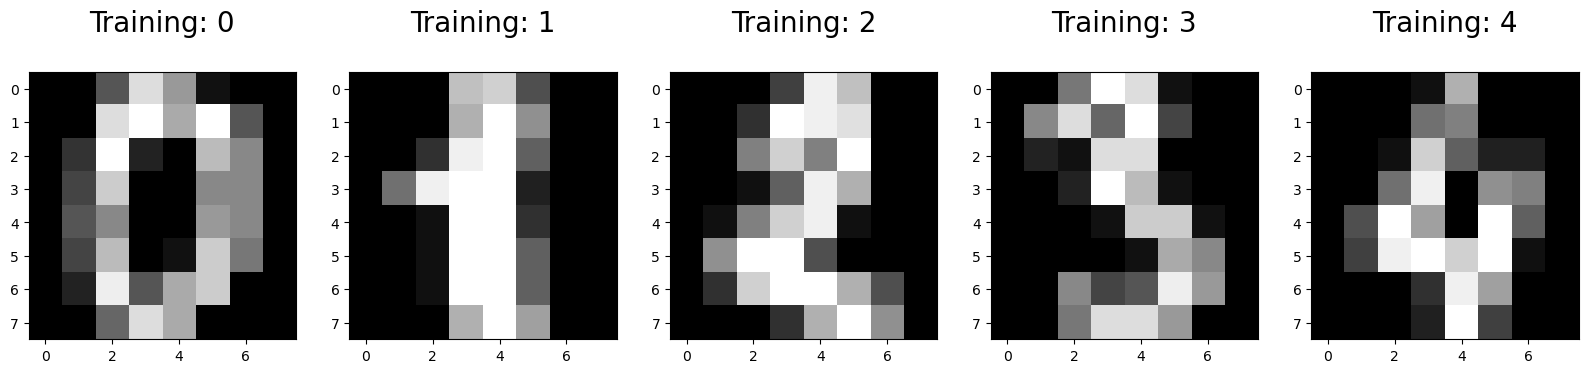

In [23]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [27]:
print(x_train.shape)

(1383, 64)


In [29]:
print(y_train.shape)

(1383,)


In [33]:
print(x_test.shape)

(414, 64)


In [35]:
print(y_test.shape)

(414,)


In [41]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

C:\Users\veray\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
print(logisticReg.predict(x_test[0].reshape(1,-1)))

[4]


In [47]:
logisticReg.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [49]:
prediction = logisticReg.predict(x_test)

In [51]:
score = logisticReg.score(x_test, y_test)
print(score)

0.9516908212560387


In [53]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


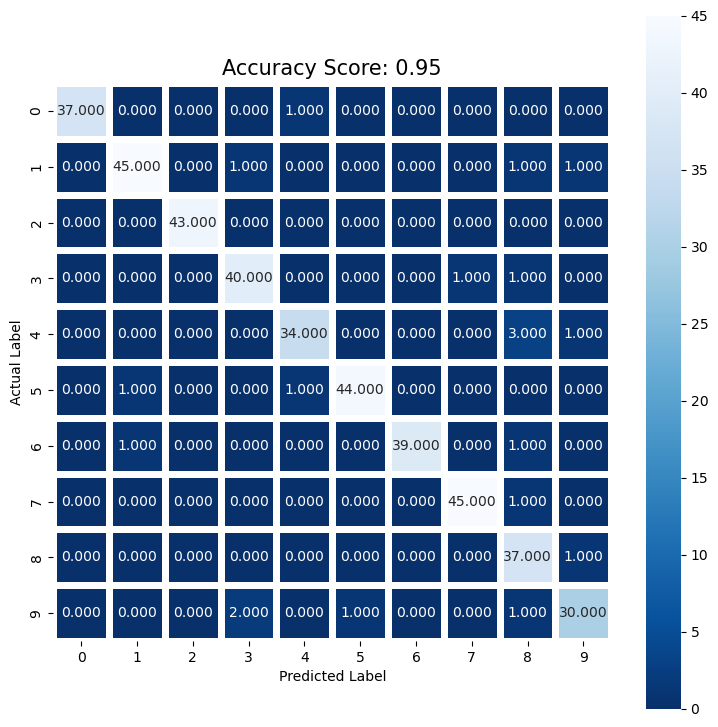

In [69]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

all_sample_title = "Accuracy Score: {0:.2f}".format(score)
plt.title(all_sample_title, size=15)
plt.show()


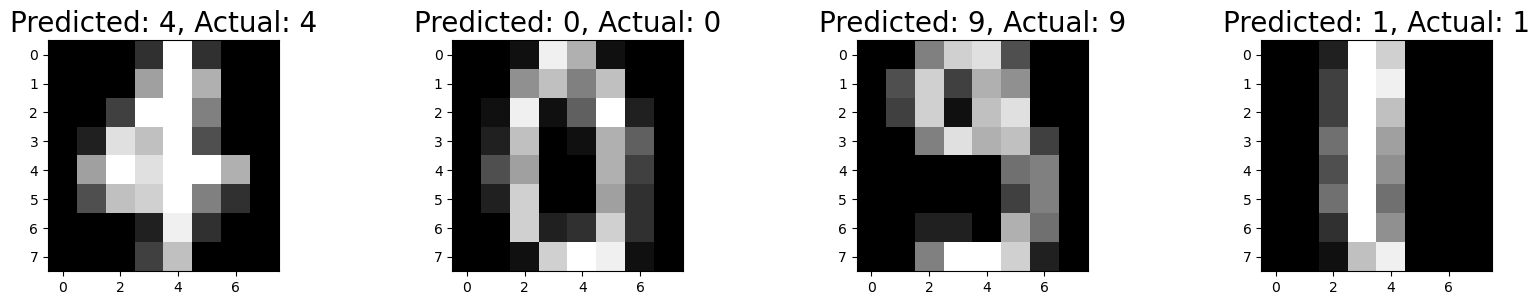

In [86]:
index = 0
classifiedIndex = []
for predict, actual in zip(prediction, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize = (20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}" .format(prediction[wrong], y_test[wrong]), fontsize = 20) 
plt.show()